In [1]:
# !pip install xgboost
# !pip install pyarrow

In [2]:
# !pip install pycaret[analysis]

In [3]:
# !pip install shap

In [4]:
# !pip install pycaret --ignore-installed llvmlite numba

In [5]:
from pycaret.classification import *

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import xgboost as xgb
root = 'C:/Users/Pratham/Documents/GitHub/instacart-customer-purchase-prediction/data/'
from sklearn.neural_network import MLPClassifier
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

In [7]:
order_products = pd.read_parquet(root + 'feature_engineer_dataset.parquet')

In [8]:
order_products.shape

(1384617, 22)

In [9]:
# filter data where eval_set = 'train'

order_products = order_products[order_products.eval_set == 'train']

In [10]:
order_products.shape

(1384617, 22)

In [11]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   order_id                         1384617 non-null  int32  
 1   product_id                       1384617 non-null  int32  
 2   add_to_cart_order                1384617 non-null  int16  
 3   reordered                        1384617 non-null  int8   
 4   product_name                     1384617 non-null  object 
 5   aisle_id                         1384617 non-null  int16  
 6   department_id                    1384617 non-null  int8   
 7   aisle                            1384617 non-null  object 
 8   department                       1384617 non-null  object 
 9   user_id                          1384617 non-null  int32  
 10  eval_set                         1384617 non-null  object 
 11  order_number                     1384617 non-null 

In [12]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,total_orders_by_user,user_reorder_percentage,user_avg_days_since_prior_order,user_most_frequent_order_dow,user_most_frequent_order_hour,total_times_product_reordered,product_reorder_percentage
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,101.0,0.619632
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,3192.0,0.713775
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,12498.0,0.524553
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,67313.0,0.691702
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods,112108,train,4,4,10,9.0,3,0.428571,10.076923,1,10,312.0,0.477795


In [13]:
exp_clf = setup(order_products, target = 'reordered',session_id = 2 , fold=3, max_encoding_ohe=100,memory=False, ignore_features=['aisle_id','order_id', 'product_id', 'user_id','department_id', 'eval_set'],categorical_features=['aisle', 'department','product_name','order_dow','order_hour_of_day'],numeric_imputation=0)

,Description,Value
0,Session id,2
1,Target,reordered
2,Target type,Binary
3,Original data shape,"(1384617, 22)"
4,Transformed data shape,"(1384617, 65)"
5,Transformed train set shape,"(969231, 65)"
6,Transformed test set shape,"(415386, 65)"
7,Ignore features,6
8,Numeric features,10
9,Categorical features,5


In [14]:
prep_pipe = get_config('X_train_transformed') 
prep_pipe.head()

,add_to_cart_order,product_name,aisle,department_produce,department_beverages,department_pantry,department_household,department_personal care,department_canned goods,department_frozen,department_dairy eggs,department_breakfast,department_snacks,department_meat seafood,department_dry goods pasta,department_bakery,department_deli,department_pets,department_other,department_bulk,department_babies,department_alcohol,department_missing,department_international,order_number,order_dow_5.0,order_dow_0.0,order_dow_1.0,order_dow_4.0,order_dow_3.0,order_dow_2.0,order_dow_6.0,order_hour_of_day_17.0,order_hour_of_day_13.0,order_hour_of_day_14.0,order_hour_of_day_8.0,order_hour_of_day_18.0,order_hour_of_day_9.0,order_hour_of_day_10.0,order_hour_of_day_16.0,order_hour_of_day_20.0,order_hour_of_day_12.0,order_hour_of_day_6.0,order_hour_of_day_19.0,order_hour_of_day_11.0,order_hour_of_day_4.0,order_hour_of_day_15.0,order_hour_of_day_7.0,order_hour_of_day_22.0,order_hour_of_day_1.0,order_hour_of_day_21.0,order_hour_of_day_2.0,order_hour_of_day_23.0,order_hour_of_day_5.0,order_hour_of_day_0.0,order_hour_of_day_3.0,days_since_prior_order,total_orders_by_user,user_reorder_percentage,user_avg_days_since_prior_order,user_most_frequent_order_dow,user_most_frequent_order_hour,total_times_product_reordered,product_reorder_percentage
268293,1.0,0.625850,0.723546,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,30.000000,5.0,14.0,3090.0,0.586338
908635,6.0,0.793462,0.735644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,5.0,0.333333,12.793103,0.0,10.0,57201.0,0.761006
90259,2.0,0.715151,0.646523,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,6.0,0.243243,14.709678,0.0,10.0,4104.0,0.665370
358944,5.0,0.552419,0.414222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,4.0,0.217391,20.294117,6.0,18.0,3514.0,0.510979
16928,4.0,0.398704,0.466133,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.446602,19.837988,1.0,22.0,569.0,0.302338


In [15]:

#  create custom model pycaret
model=create_model( xgb.XGBClassifier(class_weight='balanced'))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7075,0.7619,0.8045,0.7329,0.7670,0.3763,0.3793
1,0.7071,0.7614,0.8051,0.7322,0.7669,0.3752,0.3783
2,0.7074,0.7621,0.8067,0.7319,0.7675,0.3754,0.3786
Mean,0.7073,0.7618,0.8054,0.7323,0.7671,0.3757,0.3787
Std,0.0002,0.0003,0.0009,0.0004,0.0002,0.0005,0.0004


In [16]:
predictions=predict_model(model, raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7120,0.7690,0.8078,0.7366,0.7706,0.3862,0.3892


In [17]:
predictions.head()

,add_to_cart_order,product_name,aisle,department,order_number,order_dow,order_hour_of_day,days_since_prior_order,total_orders_by_user,user_reorder_percentage,user_avg_days_since_prior_order,user_most_frequent_order_dow,user_most_frequent_order_hour,total_times_product_reordered,product_reorder_percentage,reordered,prediction_label,prediction_score_0,prediction_score_1
1266507,8,Romaine Lettuce,fresh vegetables,produce,5,1,7,30.0,4,0.227273,18.823530,1,9,4974.0,0.483805,0,0,0.7503,0.2497
1320917,48,Organic Tomato Basil Pasta Sauce,pasta sauce,dry goods pasta,18,4,12,30.0,17,0.758621,16.890778,2,13,8892.0,0.528531,1,1,0.4381,0.5619
118839,5,Bag of Organic Bananas,fresh fruits,produce,6,0,16,30.0,5,0.250000,4.125000,4,22,315913.0,0.832555,1,1,0.4110,0.5890
791302,3,Crunchy Cheddar Jalapeno,chips pretzels,snacks,8,5,19,30.0,7,0.227273,21.090910,1,15,82.0,0.496970,1,0,0.5844,0.4156
584618,2,Dry Roasted Pumpkin Seeds,nuts seeds dried fruit,snacks,4,2,12,13.0,3,0.000000,17.909090,3,10,333.0,0.445783,0,0,0.7162,0.2838


In [26]:
predictions['misclassified'] = predictions['reordered'] != predictions['prediction_label']


In [27]:
misclassified_stats = predictions[predictions['misclassified'] == True].describe()
correctly_classified_stats = predictions[predictions['misclassified'] == False].describe()


In [28]:
misclassified_stats

,add_to_cart_order,order_number,order_dow,order_hour_of_day,days_since_prior_order,total_orders_by_user,user_reorder_percentage,user_avg_days_since_prior_order,user_most_frequent_order_dow,user_most_frequent_order_hour,total_times_product_reordered,product_reorder_percentage,reordered,prediction_label,prediction_score_0,prediction_score_1
count,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000,119616.000000
mean,9.364307,14.380593,2.709429,13.625535,18.113907,13.380593,0.408489,16.083237,2.490979,13.412060,17238.257812,0.560225,0.399495,0.600505,0.449737,0.550263
std,7.584432,13.640057,2.167538,4.227149,10.414996,13.640057,0.186168,6.951842,2.179827,3.984979,45780.046875,0.143028,0.489797,0.489797,0.204208,0.204208
min,1.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000400,0.000700
25%,4.000000,6.000000,1.000000,11.000000,8.000000,5.000000,0.267241,10.500000,0.000000,10.000000,556.000000,0.476747,0.000000,0.000000,0.300800,0.411600
50%,7.000000,10.000000,3.000000,14.000000,18.000000,9.000000,0.400000,15.545923,2.000000,13.000000,2692.000000,0.579498,0.000000,1.000000,0.448400,0.551600
75%,13.000000,17.000000,5.000000,17.000000,30.000000,16.000000,0.545455,21.146598,5.000000,16.000000,11762.000000,0.660485,1.000000,1.000000,0.588400,0.699200
max,78.000000,100.000000,6.000000,23.000000,30.000000,99.000000,0.956306,30.000000,6.000000,23.000000,398609.000000,0.900000,1.000000,1.000000,0.999300,0.999600


In [29]:
correctly_classified_stats

,add_to_cart_order,order_number,order_dow,order_hour_of_day,days_since_prior_order,total_orders_by_user,user_reorder_percentage,user_avg_days_since_prior_order,user_most_frequent_order_dow,user_most_frequent_order_hour,total_times_product_reordered,product_reorder_percentage,reordered,prediction_label,prediction_score_0,prediction_score_1
count,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000,295770.000000
mean,8.497769,18.136018,2.697113,13.559090,16.657589,17.136018,0.461992,15.104712,2.448068,13.325922,28653.425781,0.586601,0.679116,0.679116,0.379303,0.620697
std,7.348250,17.490057,2.169088,4.244473,10.408381,17.490057,0.215090,7.064577,2.179955,3.972829,69327.234375,0.156486,0.466817,0.466817,0.260985,0.260985
min,1.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000200,0.000600
25%,3.000000,6.000000,1.000000,10.000000,7.000000,5.000000,0.294118,9.230289,0.000000,10.000000,790.000000,0.502553,0.000000,0.000000,0.155500,0.414000
50%,6.000000,12.000000,3.000000,14.000000,14.000000,11.000000,0.468900,14.232324,2.000000,13.000000,3873.000000,0.610880,1.000000,1.000000,0.323650,0.676350
75%,12.000000,23.000000,5.000000,17.000000,30.000000,22.000000,0.634286,20.200001,5.000000,16.000000,20763.000000,0.696038,1.000000,1.000000,0.586000,0.844500
max,80.000000,100.000000,6.000000,23.000000,30.000000,99.000000,0.989529,30.000000,6.000000,23.000000,398609.000000,0.931035,1.000000,1.000000,0.999400,0.999800


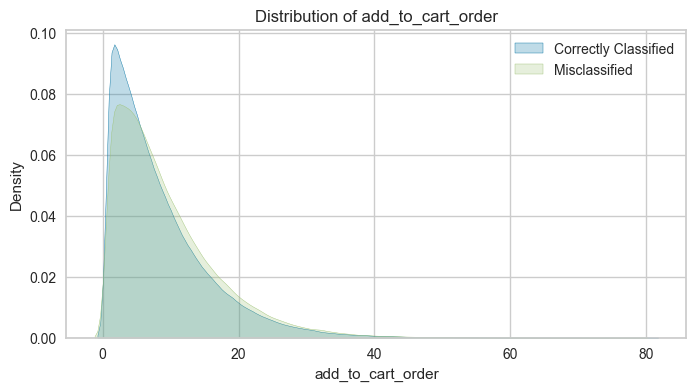

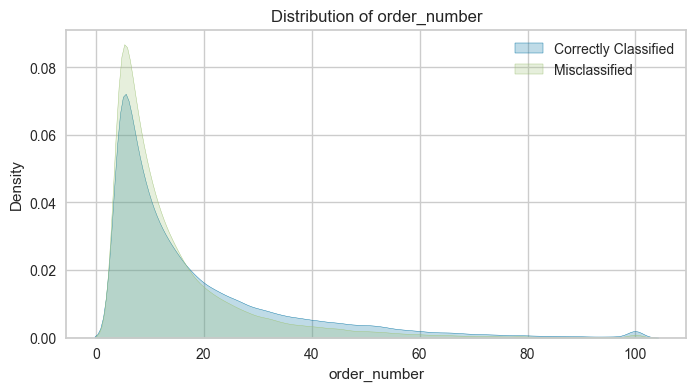

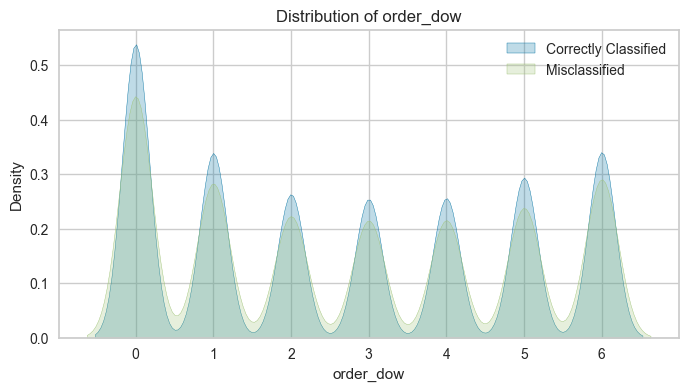

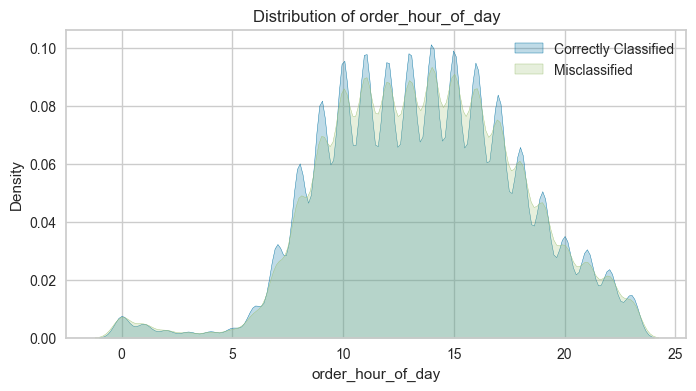

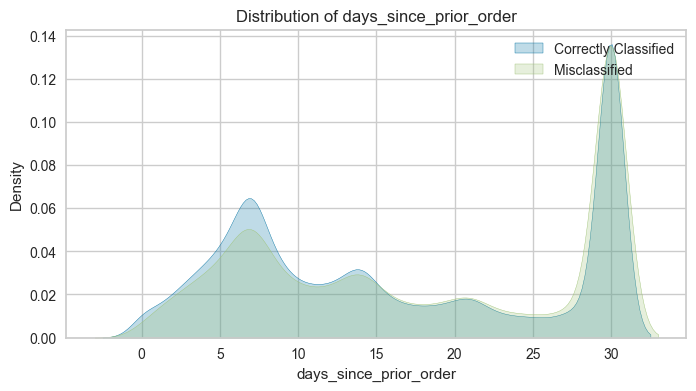

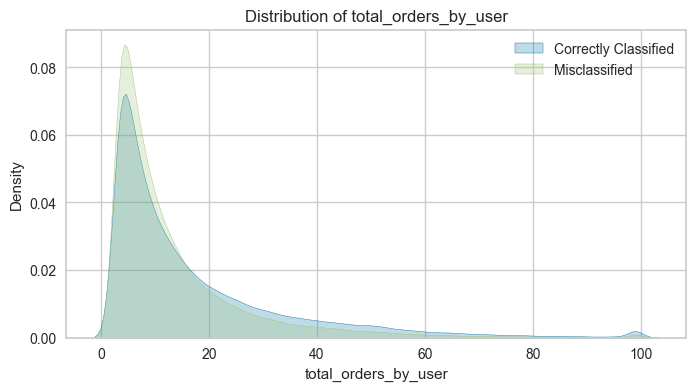

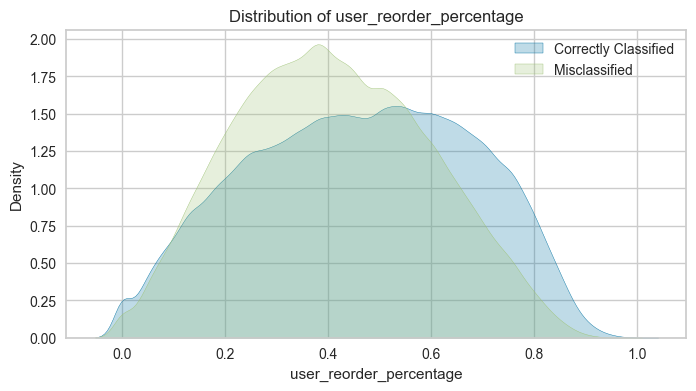

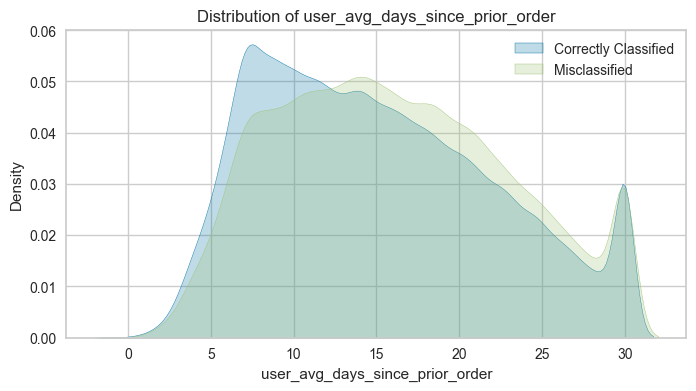

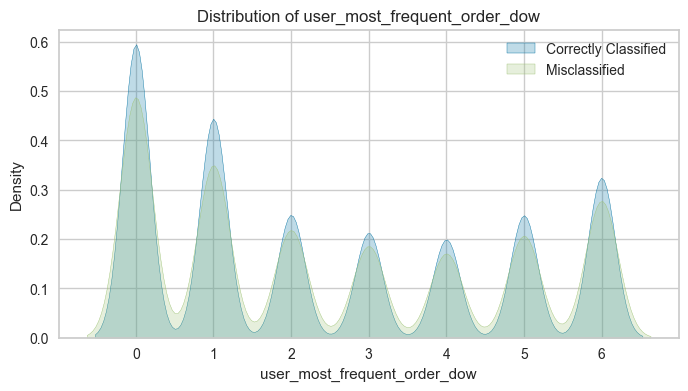

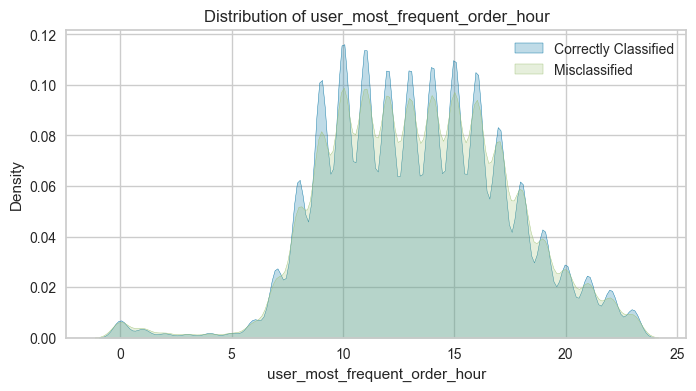

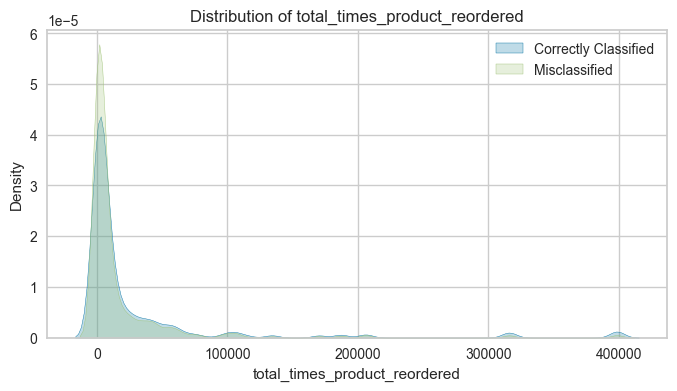

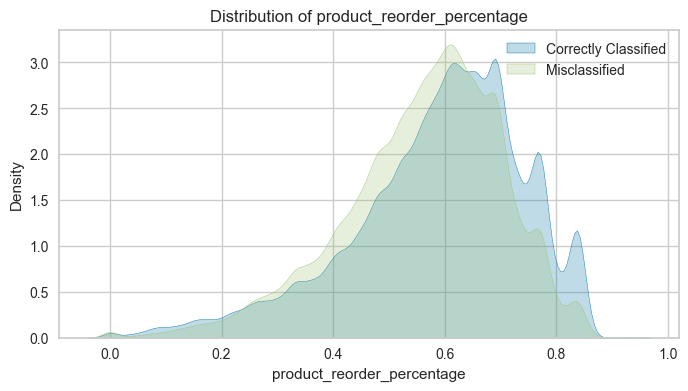

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['add_to_cart_order',	'order_number',	'order_dow',	'order_hour_of_day',	'days_since_prior_order',	'total_orders_by_user',	'user_reorder_percentage',	'user_avg_days_since_prior_order',	'user_most_frequent_order_dow',	'user_most_frequent_order_hour',	'total_times_product_reordered',	'product_reorder_percentage',]

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(predictions[predictions['misclassified'] == False][feature], label='Correctly Classified', shade=True)
    sns.kdeplot(predictions[predictions['misclassified'] == True][feature], label='Misclassified', shade=True)
    plt.legend()
    plt.title(f'Distribution of {feature}')
    plt.show()


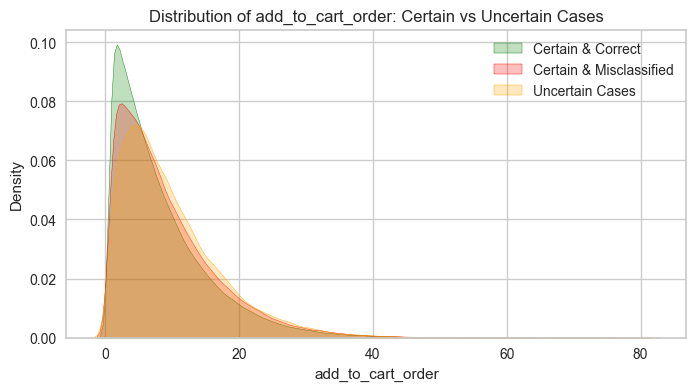

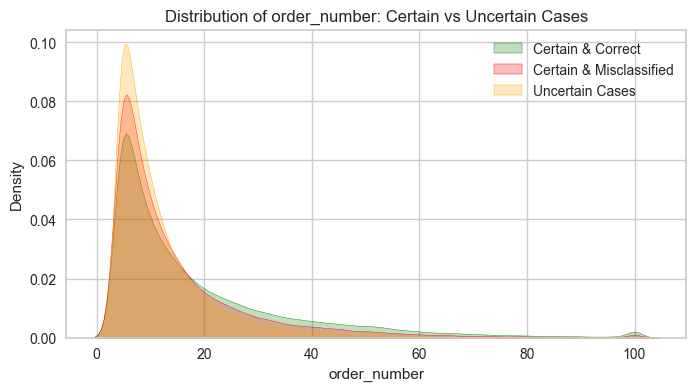

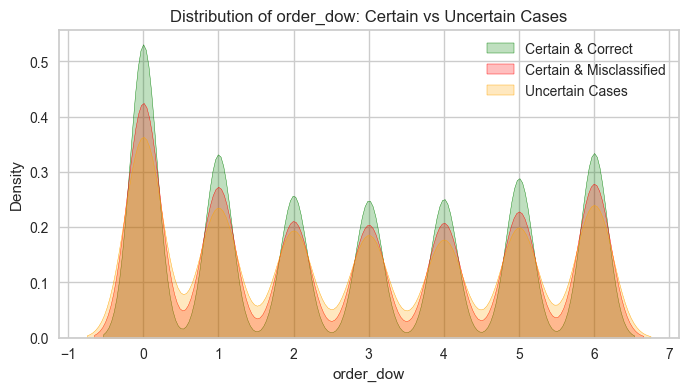

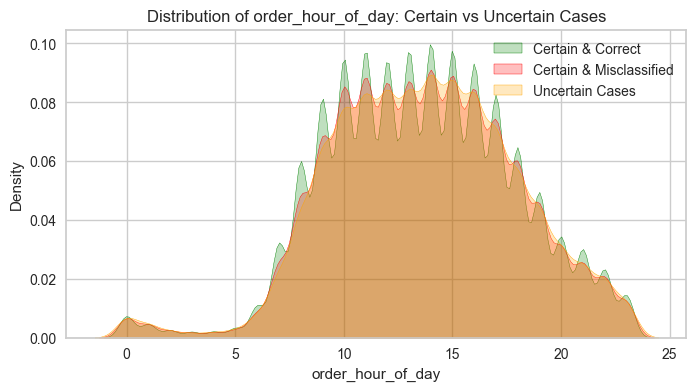

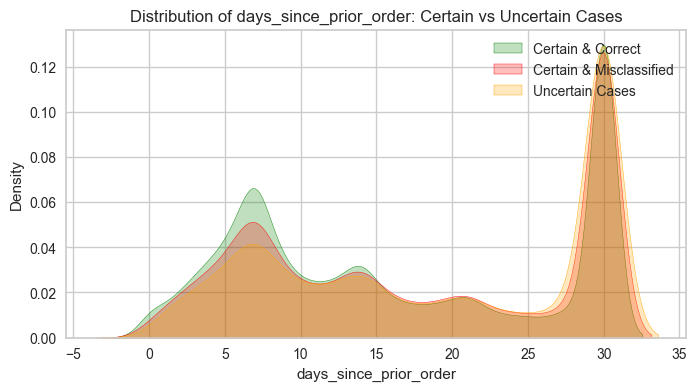

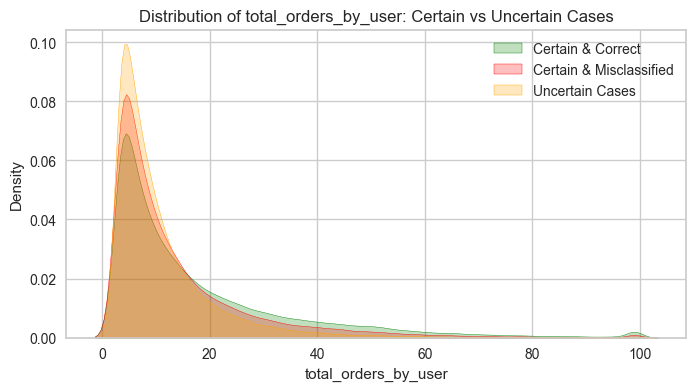

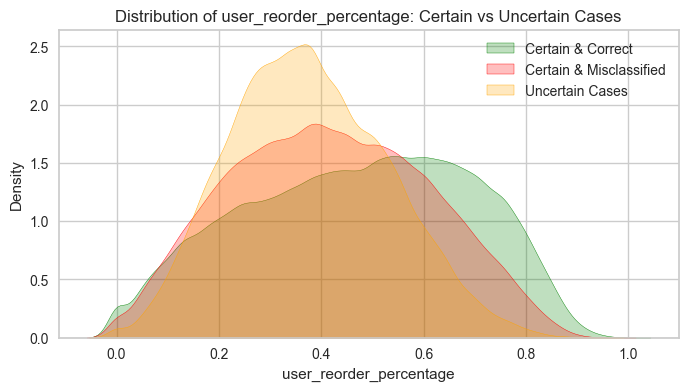

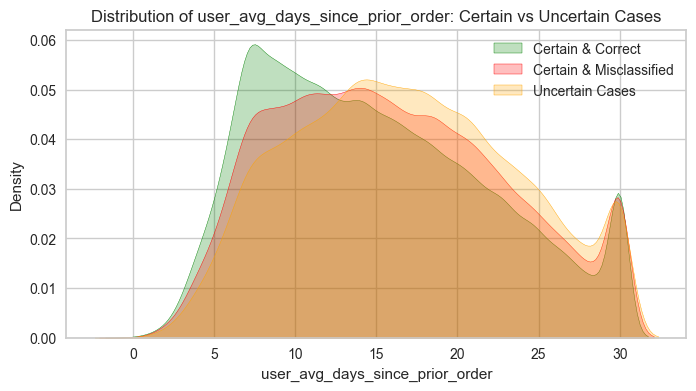

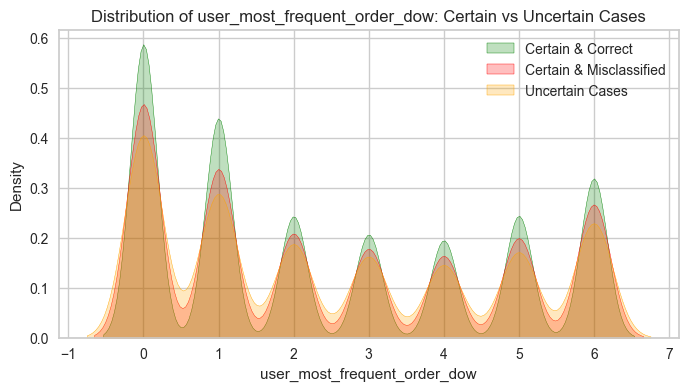

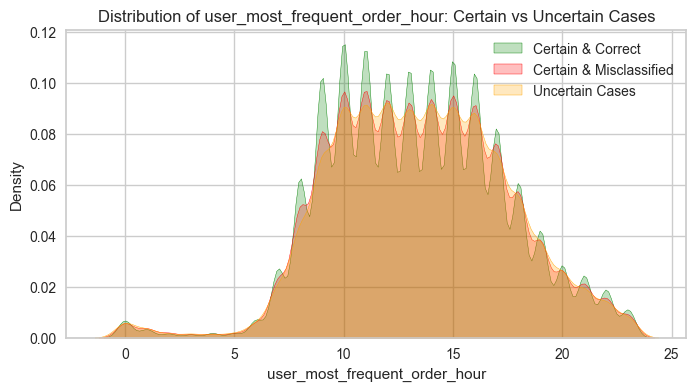

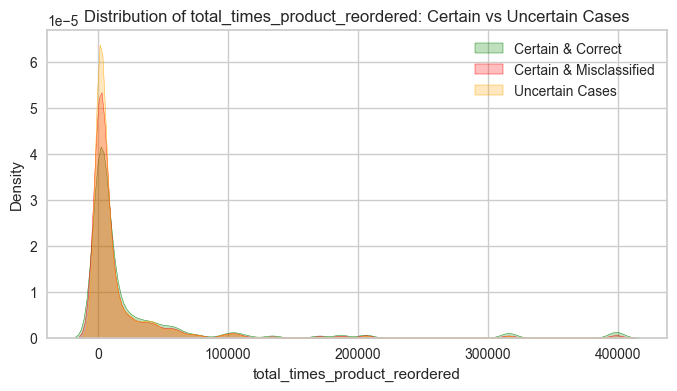

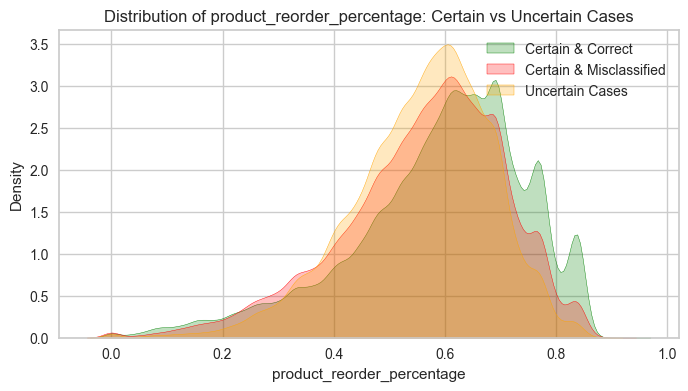

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define certain and uncertain cases
uncertain_cases = predictions[
    (predictions['prediction_score_1'] >= 0.45) & 
    (predictions['prediction_score_1'] <= 0.55)
]

certain_cases = predictions[~predictions.index.isin(uncertain_cases.index)]

# Further divide certain cases into correctly classified and misclassified
certain_correct = certain_cases[certain_cases['prediction_label'] == certain_cases['reordered']]
certain_misclassified = certain_cases[certain_cases['prediction_label'] != certain_cases['reordered']]

# List of features to analyze
features = [
    'add_to_cart_order', 'order_number', 'order_dow', 'order_hour_of_day',
    'days_since_prior_order', 'total_orders_by_user', 'user_reorder_percentage',
    'user_avg_days_since_prior_order', 'user_most_frequent_order_dow',
    'user_most_frequent_order_hour', 'total_times_product_reordered',
    'product_reorder_percentage'
]

# Create KDE plots for all three cases
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(certain_correct[feature], label='Certain & Correct', shade=True, color='green')
    sns.kdeplot(certain_misclassified[feature], label='Certain & Misclassified', shade=True, color='red')
    sns.kdeplot(uncertain_cases[feature], label='Uncertain Cases', shade=True, color='orange')
    plt.legend()
    plt.title(f'Distribution of {feature}: Certain vs Uncertain Cases')
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()


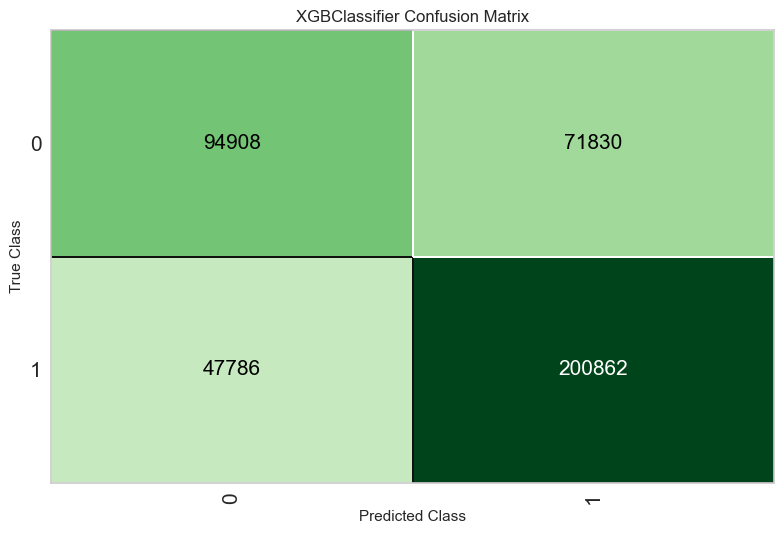

In [18]:
plot_model(model, plot = 'confusion_matrix')

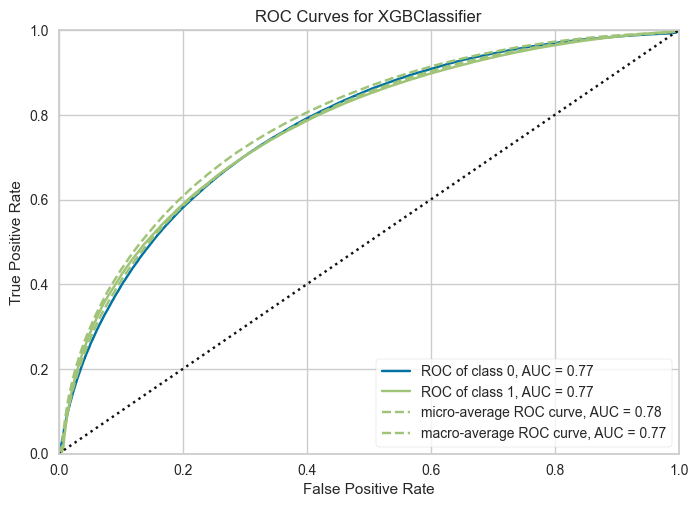

In [19]:
plot_model(model)

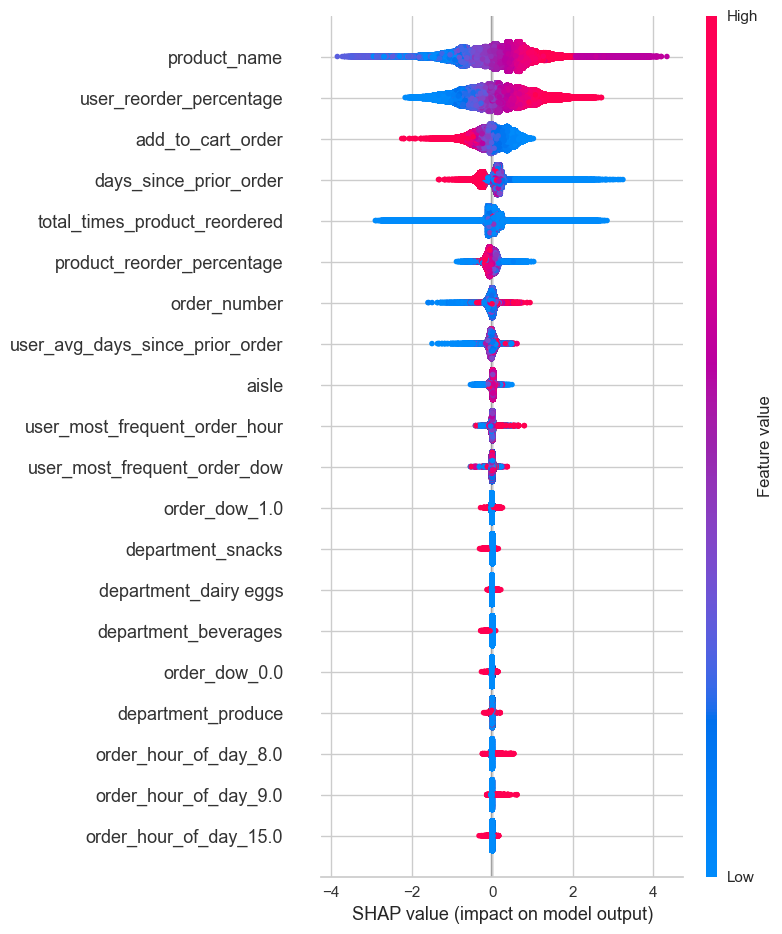

In [20]:
interpret_model(model)


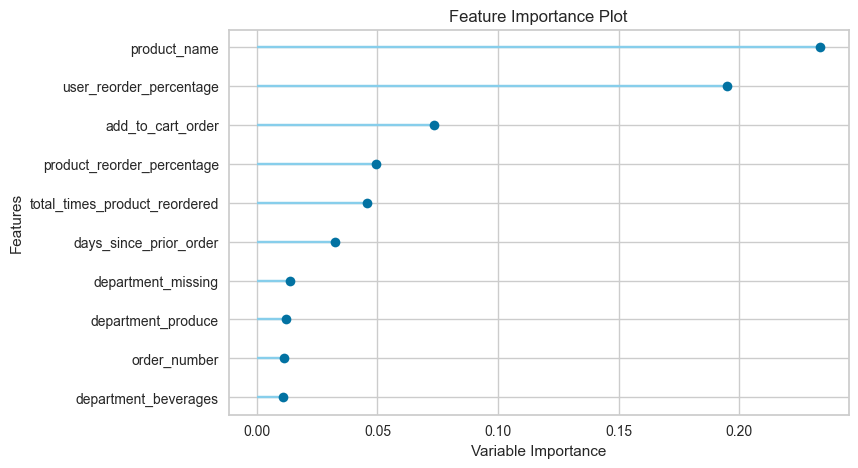

In [21]:
plot_model(model, plot='feature')


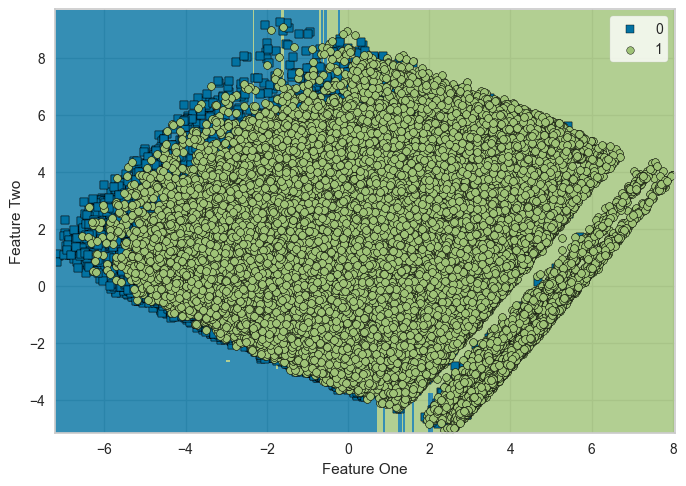

In [22]:
plot_model(model, plot='boundary')

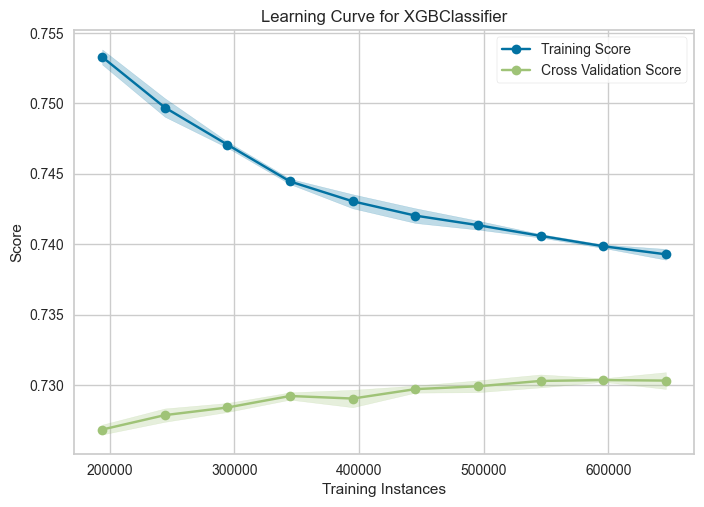

In [23]:
plot_model(model, plot='learning')

In [24]:
prep_pipe = get_config('train_transformed') 
prep_pipe.to_parquet(root + 'train_transformed.parquet')

prep_pipe = get_config('test_transformed')
prep_pipe.to_parquet(root + 'test_transformed.parquet')